In [2]:
#pip install imagesize

In [71]:
# Import Packages

import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [5]:
#image size EDA code obtained from https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05

In [43]:
directory = 'isic_data/ISIC_2019_Training_Input/'
# Get the Image Resolutions
imgs = [img.name for img in Path(directory).iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(directory+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Total Nr of Images in the dataset: 25327


,FileName,Size,Width,Height,Aspect Ratio
0,ISIC_0030340.jpg,"(600, 450)",600,450,1.33
1,ISIC_0062954.jpg,"(1024, 1024)",1024,1024,1.00
2,ISIC_0056393.jpg,"(1024, 1024)",1024,1024,1.00
3,ISIC_0054935.jpg,"(1024, 1024)",1024,1024,1.00
4,ISIC_0070973.jpg,"(1024, 1024)",1024,1024,1.00


In [44]:
img_meta_df.shape

(25327, 5)

In [45]:
#There's an odd-sized image of (-1,-1)
img_meta_df.loc[img_meta_df['Size'] == (-1,-1)]

,FileName,Size,Width,Height,Aspect Ratio
2445,ISIC_0026613.jpg,"(-1, -1)",-1,-1,1.0


Text(0, 0.5, 'Height')

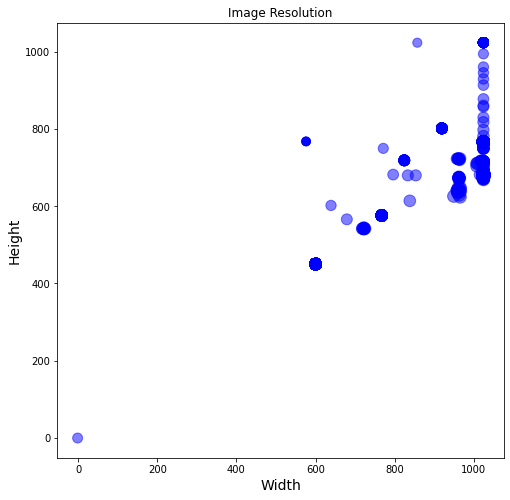

In [48]:
# Plot image sizes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

Text(0, 0.5, 'Count')

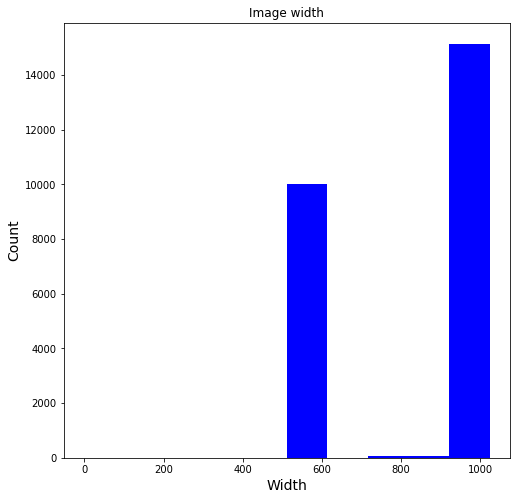

In [49]:
#Histogram of image widths
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.hist(img_meta_df.Width, color='blue')
ax.set_title("Image width")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Count", size=14)



Text(0, 0.5, 'Count')

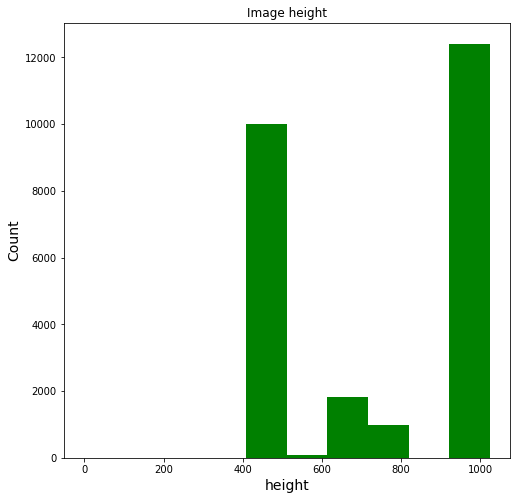

In [50]:
#histogram of image heights
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.hist(img_meta_df.Height, color='green')
ax.set_title("Image height")
ax.set_xlabel("height", size=14)
ax.set_ylabel("Count", size=14)

In [51]:
image_ratio = img_meta_df.groupby(['Aspect Ratio','Size']).count()
image_ratio.sort_values(by = 'FileName', ascending = False).head(20)

,,FileName,Width,Height
Aspect Ratio,Size,,,
1.00,"(1024, 1024)",12410,12410,12410
1.33,"(600, 450)",10014,10014,10014
1.51,"(1024, 680)",1121,1121,1121
1.33,"(1024, 768)",774,774,774
1.50,"(1024, 682)",173,173,173
1.49,"(1024, 685)",156,156,156
1.34,"(1024, 764)",81,81,81
1.50,"(1024, 681)",78,78,78
1.51,"(1024, 679)",68,68,68


In [52]:
image_size = img_meta_df.groupby('Size').count()
image_size.sort_values(by = 'FileName', ascending = False).head(20)

,FileName,Width,Height,Aspect Ratio
Size,,,,
"(1024, 1024)",12410,12410,12410,12410
"(600, 450)",10014,10014,10014,10014
"(1024, 680)",1121,1121,1121,1121
"(1024, 768)",774,774,774,774
"(1024, 682)",173,173,173,173
"(1024, 685)",156,156,156,156
"(1024, 764)",81,81,81,81
"(1024, 681)",78,78,78,78
"(1024, 679)",68,68,68,68


In [53]:
img_meta_df.describe()

,Width,Height,Aspect Ratio
count,25327.000000,25327.000000,25327.000000
mean,854.846212,760.756702,1.180227
std,207.011373,269.759322,0.182607
min,-1.000000,-1.000000,0.750000
25%,600.000000,450.000000,1.000000
50%,1024.000000,768.000000,1.330000
75%,1024.000000,1024.000000,1.330000
max,1024.000000,1024.000000,1.550000


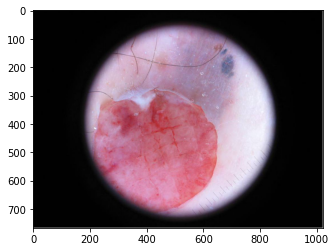

In [65]:
image_path = 'isic_data/ISIC_2019_Training_Input/ISIC_0000004.jpg'
image = Image.open(image_path)
plt.imshow(image)


In [69]:
img_meta_df.loc[img_meta_df['FileName'] == 'ISIC_0000004.jpg']

,FileName,Size,Width,Height,Aspect Ratio
8709,ISIC_0000004.jpg,"(1022, 767)",1022,767,1.33


Consider rewriting this model with the Functional API.


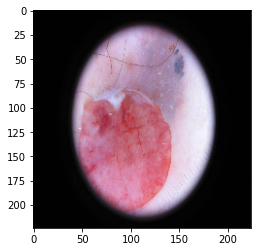

In [72]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])
result = resize_and_rescale(image)
_ = plt.imshow(result)

Consider rewriting this model with the Functional API.


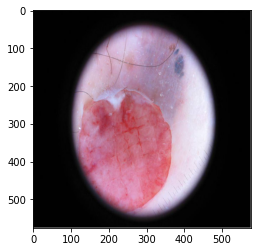

In [74]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(576, 576),
  layers.Rescaling(1./255)
])
result = resize_and_rescale(image)
_ = plt.imshow(result)